# GSE141730

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad

In [2]:
results_file = 'GSE141730/output.h5ad'  # the file that will store the analysis results

The original data is provided in a .h5 file, which can be read in with the sc.read_10x_h5 function.

In [3]:
adata = sc.read_10x_h5('GSE141730/GSM4212550_BDR3_filtered_gene_bc_matrices.h5')

C:\Users\lotte\anaconda3\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [4]:
adata.var_names_make_unique()
adata

C:\Users\lotte\anaconda3\lib\site-packages\anndata\utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['U6-1', 'PEX3-1']
  warnings.warn(


AnnData object with n_obs × n_vars = 1975 × 34262
    var: 'gene_ids'

## Preprocessing

Before single-cell transcriptomes can be obtained from plant cells, the cells must be protoplasted first. During this process, some genes are induced. These genes are thus confounding and are first removed from the dataset.

In [5]:
adata_df = adata.to_df()
adata_df.head()

,NAC001,ARV1,AT1G03987,NGA3,DCL1,AT1G03993,MIR838A,ath-MIR838,PPA1,AT1G03997,...,RPS7-A-1,NDHB.2,Intron_gpII-25,TRNL.4,ycf15-B-1,ycf2-A-1,TRNI.4,RPL23-A-1,rpl2-B-1,Intron_gpII-26
AAACCTGAGCCGATTT-1,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGCACCCAGTG-1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGCAGGCGATA-1,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACGGGAGCTGAACG-1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACGGGCAGCTTCGG-1,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Read protoplasting-induced genes
protoplasting_genes = pd.read_excel('protoplast-DE-genes.xlsx', sheet_name='Sheet1', header = None)
protoplasting_genes[0].tolist()

['AT2G26390',
 'AT2G26400',
 'AT2G26530',
 'AT2G41640',
 'AT2G47550',
 'AT1G44350',
 'AT1G44318',
 'AT4G17490',
 'AT4G17500',
 'AT4G14680',
 'AT4G15530',
 'AT4G15300',
 'AT4G14980',
 'AT1G28330',
 'AT5G04250',
 'AT5G04340',
 'AT1G73500',
 'AT1G73540',
 'AT1G73530',
 'AT5G11070',
 'AT5G10695',
 'AT5G20230',
 'AT4G37240',
 'AT4G36880',
 'AT3G56710',
 'AT3G44860',
 'AT1G58190',
 'AT5G17650',
 'AT5G16230',
 'AT5G14730',
 'AT5G36250',
 'AT5G26340',
 'AT5G67080',
 'AT5G66650',
 'AT5G65300',
 'AT5G64870',
 'AT5G64660',
 'AT5G63330',
 'AT5G63130',
 'AT5G62520',
 'AT5G58670',
 'AT5G58560',
 'AT5G57710',
 'AT5G57510',
 'AT5G57560',
 'AT5G55090',
 'AT5G54470',
 'AT5G54490',
 'AT5G53750',
 'AT5G52660',
 'AT5G52020',
 'AT5G51460',
 'AT5G51470',
 'AT5G51260',
 'AT5G50450',
 'AT5G50570',
 'AT5G49450',
 'AT5G49520',
 'AT5G47220',
 'AT5G45810',
 'AT5G45340',
 'AT5G44770',
 'AT5G43890',
 'AT5G43030',
 'AT5G42650',
 'AT5G40880',
 'AT5G39050',
 'AT5G35580',
 'AT5G24600',
 'AT5G23130',
 'AT5G22570',
 'AT5G

In [7]:
# Annotate gene names
gene_annot = {}
for line in open('mart_export_2.txt'):
    line = line.split('\t')
    #print(line)
    if line[1] != '\n':
        gene_annot[line[0]] = line[1].rstrip()
    else:
        gene_annot[line[0]] = line[0].rstrip()
gene_annot
protoplasting_genes.replace(to_replace = gene_annot, inplace = True)
print(protoplasting_genes)

             0
0    AT2G26390
1          ARD
2        AR781
3    AT2G41640
4        PME20
..         ...
341     WRKY35
342  AT2G33710
343      RTFL8
344   CYP734A1
345  AT2G39650

[346 rows x 1 columns]


In [8]:
# Remove protoplasting-induced genes from the AnnData object
counter = 0
for gene in protoplasting_genes[0].tolist():
    try:
        adata_df.drop([gene] , axis=1, inplace = True)
    except:
        print(f"An exception occurred {gene}") 
        counter += 1
        
print(f"{counter} errors")

An exception occurred AT5G63330
An exception occurred AT5G44810
An exception occurred AT1G64470
An exception occurred DA2L
An exception occurred AT2G16590
5 errors


In [9]:
# Create again AnnData object from df
adata = ad.AnnData(adata_df)
adata

AnnData object with n_obs × n_vars = 1975 × 33921

The genes with the highest expression per cell are visualized.

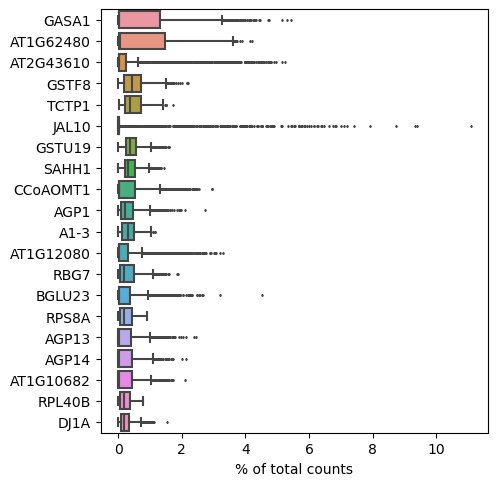

In [10]:
# Show genes that yield in the highest fraction of counts in each single cell, across all cells.
sc.pl.highest_expr_genes(adata, n_top=20, )

To have high-quality data, cells with less than 200 genes and genes that occur in less than 3 cells are removed.

In [11]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
adata

AnnData object with n_obs × n_vars = 1975 × 22275
    obs: 'n_genes'
    var: 'n_cells'

Poor quality samples can be identified by looking at mitochondrial contamination from dead or dying cells. Here, the mitochondrial genes are visualized.

In [12]:
# Annotate mitochondrial genes, which are important for quality control (indicates possible poor-quality cells)
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

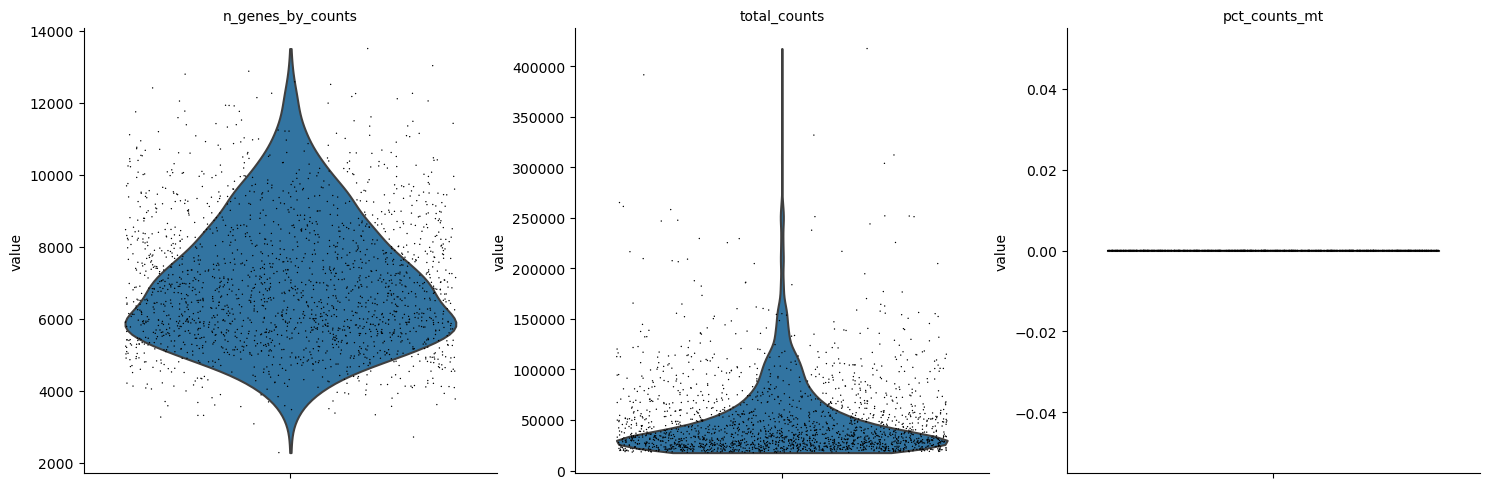

In [13]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

The violin plots of the mitochondrial genes indicate that these genes were already removed from the dataset. Therefore, we don't have to take this into account.

Cells with a high amount of genes expressed are also removed.

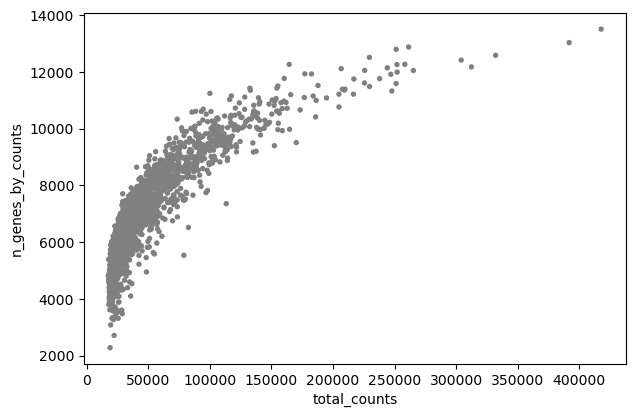

In [14]:
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [15]:
# Filter bad-quality cells out
adata = adata[adata.obs.n_genes_by_counts < 13000, :]
adata

View of AnnData object with n_obs × n_vars = 1973 × 22275
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

The data is normalized and log-transformed to make it more comparable.

In [16]:
# Library size correction
sc.pp.normalize_total(adata)

C:\Users\lotte\anaconda3\lib\site-packages\scanpy\preprocessing\_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [17]:
# Logarithmize the data
sc.pp.log1p(adata)

In [18]:
adata.rw = adata

## Principle component analysis

At the moment, the data has 22275 dimensions ( = amount of genes). It will be very computer-intensive to use all this information. Therefore, the amount of dimensions will be reduced while maintaining as much of the information as possible using Principle Component Analysis (PCA).

In [19]:
sc.tl.pca(adata, svd_solver='arpack')

The expression of SOMBRERO (SMB), a root cap specific marker, can be mapped on the first two principle components:

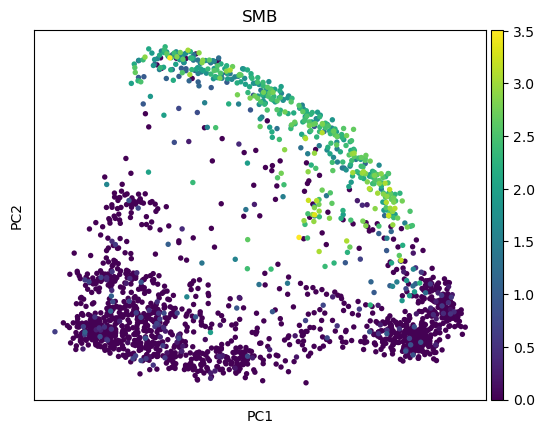

In [20]:
sc.pl.pca(adata, color='SMB')

Principle components have a decreasing contribution to the total variance:

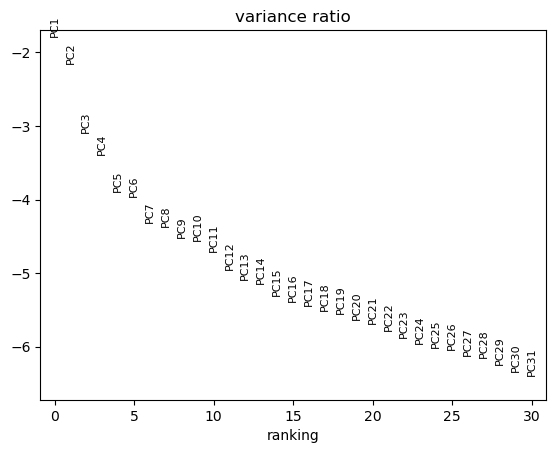

In [21]:
# Look at the contribution of single PCs to the total variance
sc.pl.pca_variance_ratio(adata, log=True)

In [22]:
adata.write(results_file)
adata

AnnData object with n_obs × n_vars = 1973 × 22275
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

## Computing the neighborhood graph

The neighborhood graph of the data is calculated using 30 neighbors and 50 principle components.

In [23]:
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=50)

## Embedding the neighborhood graph

The data can be visualized using UMAP.

In [24]:
sc.tl.umap(adata)

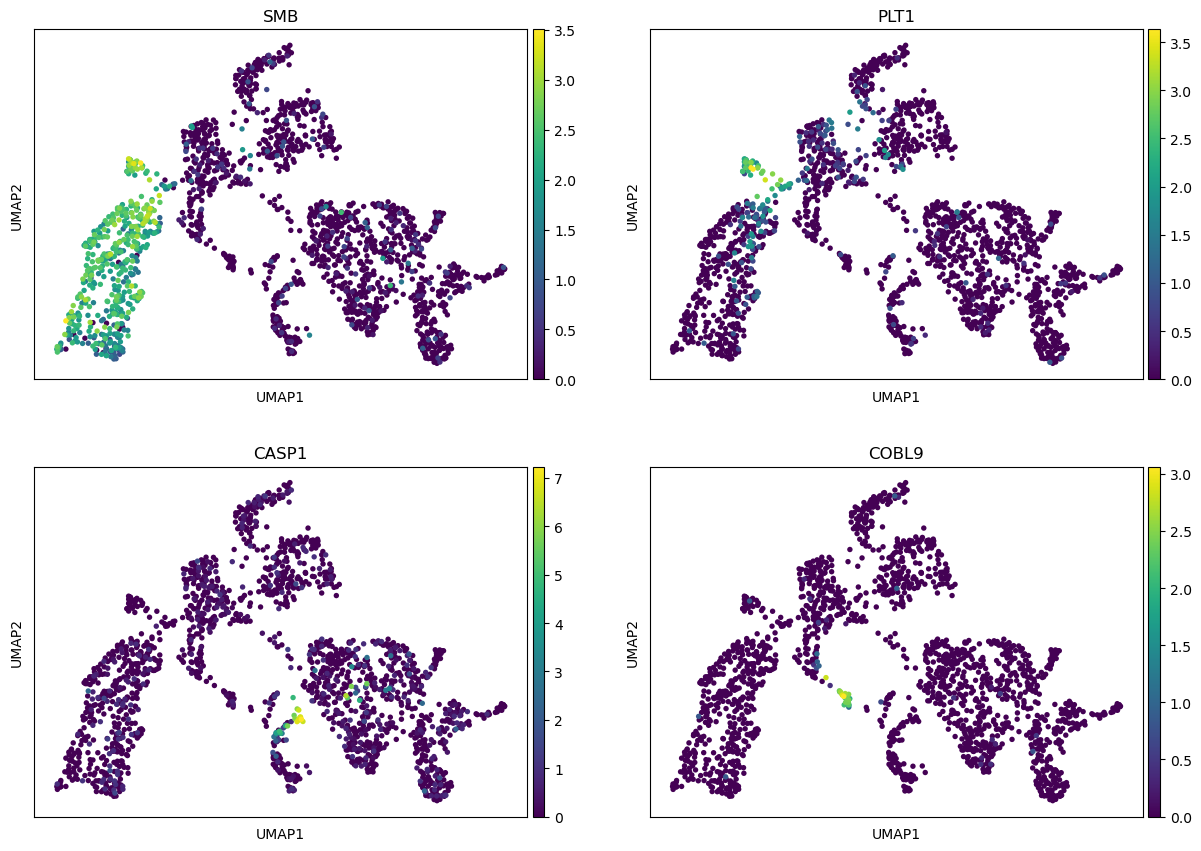

In [25]:
# SMB = root cap (QC + columella + LRC)
# PLT1 = QC
# CASP1 = endodermis
# COBL9 = trichoblast
sc.pl.umap(adata, color=['SMB','PLT1', 'CASP1', 'COBL9'], ncols = 2)

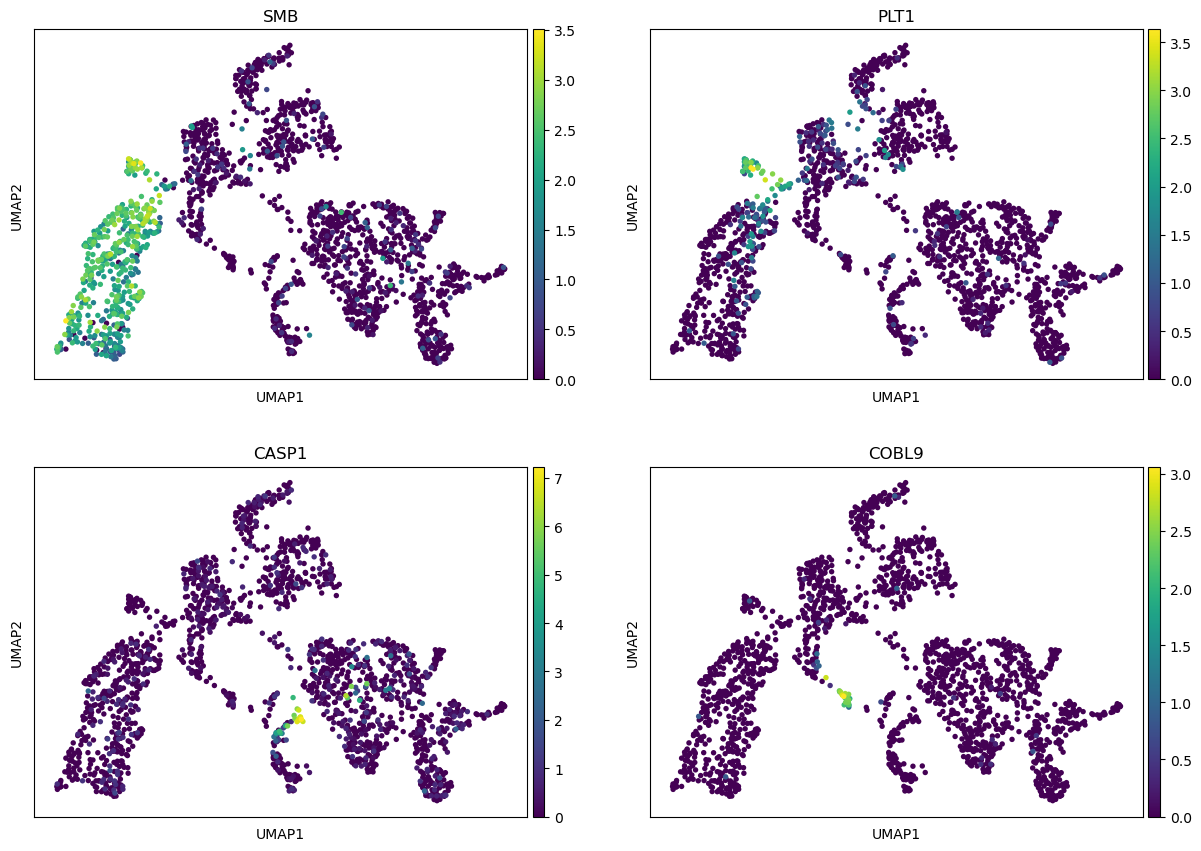

In [26]:
sc.pl.umap(adata, color=['SMB','PLT1', 'CASP1', 'COBL9'], use_raw=False, ncols = 2)

## Clustering the neighborhood graph

Based on the neighborhood graph, the data can be clustered by Louvain clustering. Different resolutions are being tested.

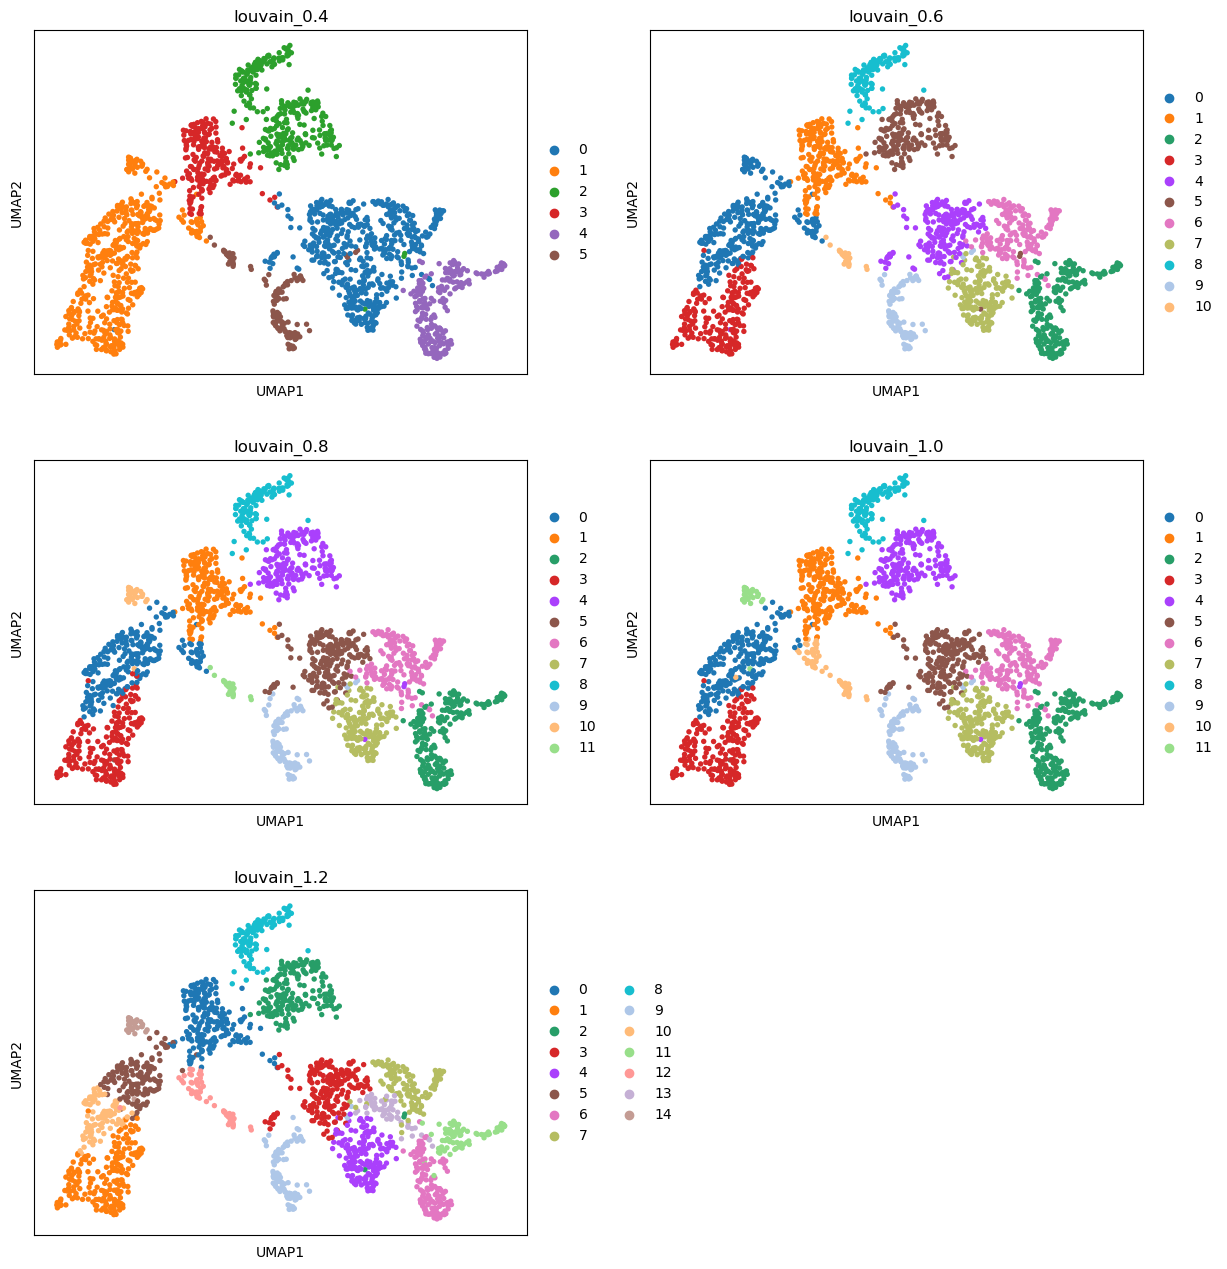

In [27]:
# Louvain clustering
sc.tl.louvain(adata, key_added = "louvain_1.0") # default resolution in 1.0
sc.tl.louvain(adata, resolution = 0.6, key_added = "louvain_0.6")
sc.tl.louvain(adata, resolution = 0.4, key_added = "louvain_0.4")
sc.tl.louvain(adata, resolution = 0.8, key_added = "louvain_0.8")
sc.tl.louvain(adata, resolution = 1.4, key_added = "louvain_1.2")

sc.pl.umap(adata, color=['louvain_0.4', 'louvain_0.6', 'louvain_0.8', 'louvain_1.0','louvain_1.2'], ncols=2)

In [28]:
adata.write(results_file)

## Finding marker genes

For each cluster of the Louvain clustering with a resolution of 1.0, highly differential genes are identified using t-tests.

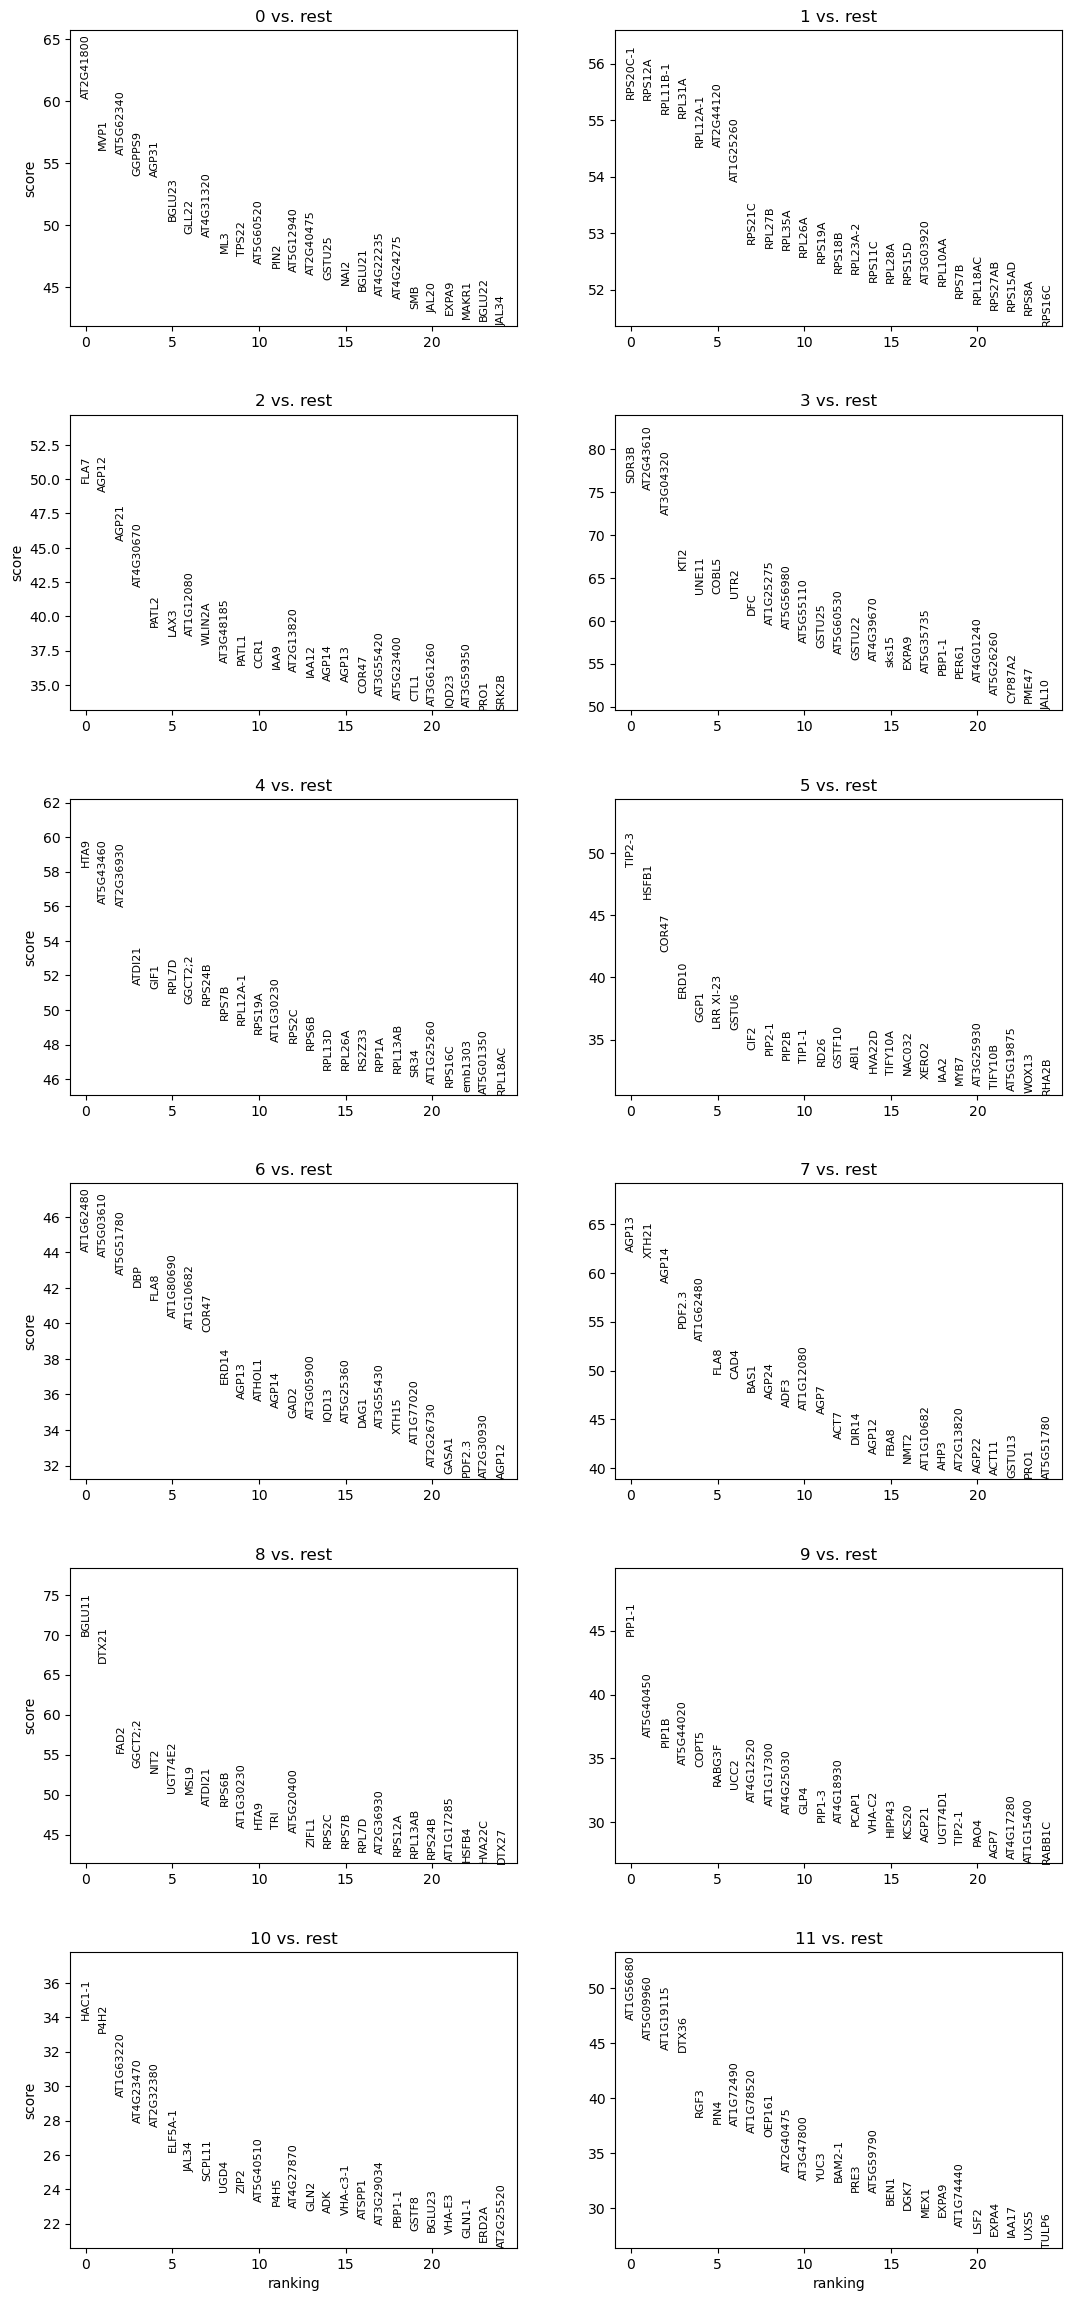

In [29]:
# Compute a ranking for the highly differential genes in each cluster
sc.tl.rank_genes_groups(adata, groupby='louvain_1.0', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, ncols = 2)

In [30]:
adata.write(results_file)

In [31]:
adata = sc.read(results_file)

In [32]:
# Show the top 10 ranked genes per cluster
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(10)

,0,1,2,3,4,5,6,7,8,9,10,11
0,AT2G41800,RPS20C-1,FLA7,SDR3B,HTA9,TIP2-3,AT1G62480,AGP13,BGLU11,PIP1-1,HAC1-1,AT1G56680
1,MVP1,RPS12A,AGP12,AT2G43610,AT5G43460,HSFB1,AT5G03610,XTH21,DTX21,AT5G40450,P4H2,AT5G09960
2,AT5G62340,RPL11B-1,AGP21,AT3G04320,AT2G36930,COR47,AT5G51780,AGP14,FAD2,PIP1B,AT1G63220,AT1G19115
3,GGPPS9,RPL31A,AT4G30670,KTI2,ATDI21,ERD10,DBP,PDF2.3,GGCT2;2,AT5G44020,AT4G23470,DTX36
4,AGP31,RPL12A-1,PATL2,UNE11,GIF1,GGP1,FLA8,AT1G62480,NIT2,COPT5,AT2G32380,RGF3
5,BGLU23,AT2G44120,LAX3,COBL5,RPL7D,LRR XI-23,AT1G80690,FLA8,UGT74E2,RABG3F,ELF5A-1,PIN4
6,GLL22,AT1G25260,AT1G12080,UTR2,GGCT2;2,GSTU6,AT1G10682,CAD4,MSL9,UCC2,JAL34,AT1G72490
7,AT4G31320,RPS21C,WLIN2A,DFC,RPS24B,CIF2,COR47,BAS1,ATDI21,AT4G12520,SCPL11,AT1G78520
8,ML3,RPL27B,AT3G48185,AT1G25275,RPS7B,PIP2-1,ERD14,AGP24,RPS6B,AT1G17300,UGD4,OEP161
9,TPS22,RPL35A,PATL1,AT5G56980,RPL12A-1,PIP2B,AGP13,ADF3,AT1G30230,AT4G25030,ZIP2,AT2G40475


In [33]:
# Get table with scores and groups
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
top_DEG_genes = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']})
top_DEG_genes.head(500)

,0_n,0_p,1_n,1_p,2_n,2_p,3_n,3_p,4_n,4_p,...,7_n,7_p,8_n,8_p,9_n,9_p,10_n,10_p,11_n,11_p
0,AT2G41800,1.704208e-305,RPS20C-1,0.000000e+00,FLA7,3.421970e-169,SDR3B,0.000000e+00,HTA9,0.000000e+00,...,AGP13,0.000000e+00,BGLU11,2.171711e-119,PIP1-1,8.356016e-87,HAC1-1,5.066492e-45,AT1G56680,1.414515e-32
1,MVP1,1.360460e-247,RPS12A,0.000000e+00,AGP12,1.480117e-269,AT2G43610,0.000000e+00,AT5G43460,2.206240e-318,...,XTH21,6.876236e-156,DTX21,1.760662e-145,AT5G40450,7.385276e-80,P4H2,1.818925e-45,AT5G09960,4.565817e-32
2,AT5G62340,8.165311e-183,RPL11B-1,1.350470e-255,AGP21,5.591731e-198,AT3G04320,3.625118e-234,AT2G36930,1.702397e-313,...,AGP14,0.000000e+00,FAD2,1.374923e-181,PIP1B,2.487663e-82,AT1G63220,4.017744e-42,AT1G19115,1.719752e-30
3,GGPPS9,1.032863e-179,RPL31A,0.000000e+00,AT4G30670,1.138177e-116,KTI2,8.226635e-244,ATDI21,3.096146e-314,...,PDF2.3,1.921117e-278,GGCT2;2,2.896626e-228,AT5G44020,2.908057e-68,AT4G23470,2.449917e-40,DTX36,1.092839e-40
4,AGP31,4.689031e-242,RPL12A-1,0.000000e+00,PATL2,2.234069e-133,UNE11,4.052941e-210,GIF1,1.238429e-141,...,AT1G62480,0.000000e+00,NIT2,2.771080e-134,COPT5,9.475739e-79,AT2G32380,2.235397e-39,RGF3,5.287314e-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,CPK3,2.125246e-51,AT1G15230,2.757091e-81,VHA-B3,1.296685e-33,FATA2,4.414276e-37,DIM1A,1.930732e-56,...,ERD14,3.033733e-48,CP31A,1.707668e-38,IAA17,2.318763e-24,AT3G08650,5.852160e-14,RABA2A,6.385238e-10
496,RACK1C,3.665564e-49,CCT8,3.416751e-92,AT3G19460,2.189674e-31,AT5G19250,1.412536e-38,RPS19C,2.350255e-71,...,AT5G28050,1.886616e-45,AT5G20950,2.059078e-41,AT4G01575,5.689030e-22,DWA2,5.543182e-14,AT3G01750,1.534125e-09
497,OST3B,1.710136e-52,RGGB,2.284690e-89,AT1G64330,1.344535e-31,PERK9,6.314341e-36,MEE14,3.189153e-58,...,RPL18B,1.048498e-43,RPL7AA,7.233127e-45,VHA-D1,6.416698e-23,BCA4,6.972497e-14,PGM3,8.036868e-10
498,DWF5,7.319141e-52,AT5G27820,4.032776e-81,CBL2,1.460316e-31,PDIL1-3,6.786275e-38,NOP10,7.009375e-58,...,AT2G20100,8.051349e-37,GRF4,5.197551e-36,AT4G23490,7.587116e-22,MOT2,9.529953e-14,AT3G22104,1.465745e-09


## Cell type identification 

A cell type is assigned to the clusters by looking if one of the top differentially expressed genes is a known marker gene for a certain cell type. First, the list with known marker genes in read into a pandas dataframe.

In [34]:
# Read list of known marker genes
marker_genes_pd = pd.read_excel('marker_genes_literature.xlsx', sheet_name="Sheet1")
marker_genes = marker_genes_pd["Marker gene"].tolist()
print(marker_genes_pd)

               Cell type Marker gene Source
0           atrichoblast     ATXTH17    NaN
1           atrichoblast         GL2    NaN
2           atrichoblast       MYB23    NaN
3           atrichoblast      WRKY44    NaN
4              columella        AMY3    NaN
..                   ...         ...    ...
93                 Xylem        VND2    NaN
94                 Xylem        VND5    NaN
95  Xylem Pole Pericycle        DOT1    NaN
96  Xylem Pole Pericycle         XPP    NaN
97       young columella        LZY2   DRO3

[98 rows x 3 columns]


For the top 500 differential expressed genes per cluster, it is checked if it is a known marker gene. If this is the case, the genes is added to a list with detected marker genes and a message is printed.

In [35]:
# For significantly differential expressed genes, check if they are in list of known marker genes
detected_marker_genes = []
for i in range(0,12):
    for j in range(0,500):
        if top_DEG_genes.loc[j][str(i)+"_n"] in marker_genes:
            row = marker_genes_pd[marker_genes_pd["Marker gene"]== top_DEG_genes.loc[j][str(i)+"_n"]].index.values
            cell_type = marker_genes_pd.loc[row[0]][0]
            detected_marker_genes.append(top_DEG_genes.loc[j][str(i)+"_n"])
            print(f'Cluster {i} has the marker gene {top_DEG_genes.loc[j][str(i)+"_n"]} that is a marker for {cell_type}.')

Cluster 0 has the marker gene SMB that is a marker for Columella + LRC.
Cluster 0 has the marker gene WER that is a marker for LRC + Atrichoblast.
Cluster 0 has the marker gene ARF16 that is a marker for root cap.
Cluster 2 has the marker gene SHY2 that is a marker for Procambium + Xylem.
Cluster 2 has the marker gene HIPP20 that is a marker for Procambium + Xylem.
Cluster 2 has the marker gene DAG1 that is a marker for Stele.
Cluster 3 has the marker gene BRN2 that is a marker for Columella (1st Outer Layer) + LRC (1st Outer Layer).
Cluster 3 has the marker gene ARF16 that is a marker for root cap.
Cluster 3 has the marker gene SMB that is a marker for Columella + LRC.
Cluster 3 has the marker gene AT3G61930 that is a marker for Distal Columella.
Cluster 5 has the marker gene DAG1 that is a marker for Stele.
Cluster 5 has the marker gene AT1G02460 that is a marker for XPP.
Cluster 5 has the marker gene DOT1 that is a marker for Xylem Pole Pericycle.
Cluster 5 has the marker gene AT5G0

The expression of the detected marker genes is visualized with a dotplot.

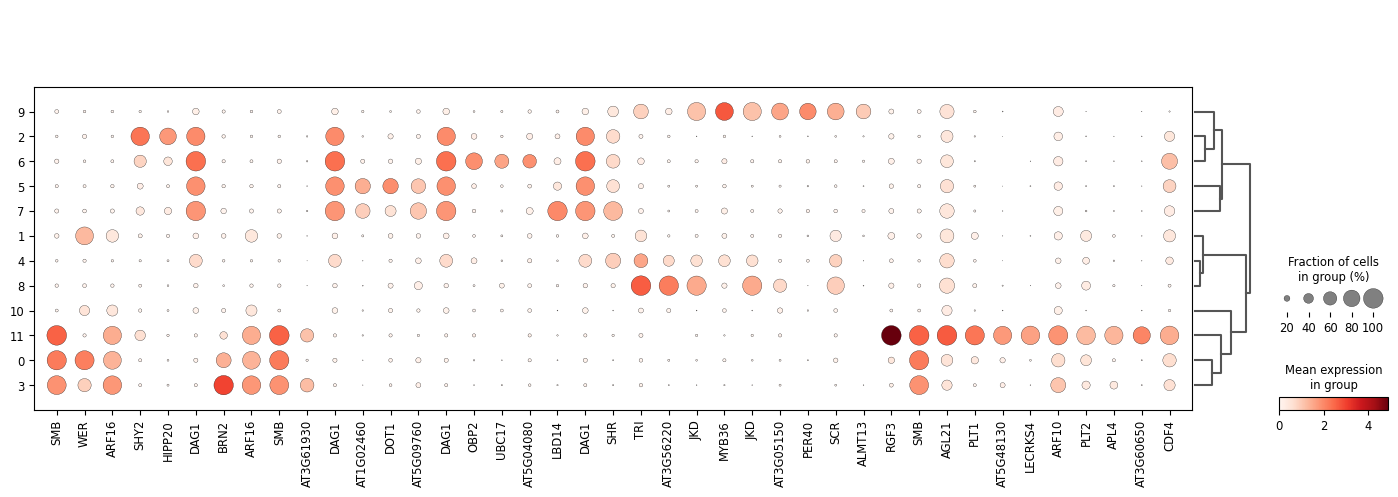

In [36]:
sc.pl.dotplot(adata, detected_marker_genes, groupby='louvain_1.0', dendrogram = True);

Based on the known marker gene and their expression pattern in the BAR eFP Browser, cell types of certain clusters can be identified:

- Cluster 2: Procambium and Xylem
- Cluster 5: Xylem Pericycle Pole (XPP)
- Cluster 6: Phloem
- Cluster 7: Pericycle
- Cluster 8: Cortex
- Cluster 9: Endodermis
- Cluster 11: Quiescent Centre (QC)

Cluster 0 and 3 are both related to the root cap. The same marker genes appear in both clusters, so it is hard to assign distinct cell types to these clusters.

Clusters 1, 4 and 10 have no reported marker genes. 

To see if there is overclustering, a correlation matrix can be made between the clusters.

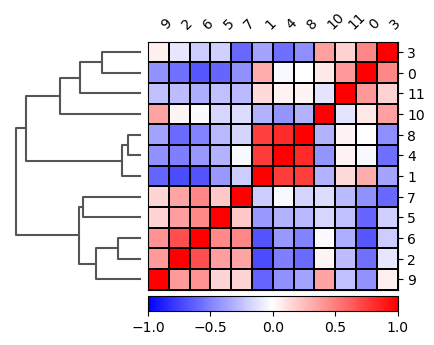

In [37]:
# Plot correlation between clusters
ax = sc.pl.correlation_matrix(adata, 'louvain_1.0', figsize=(5,3.5))

Clusters 1, 4 and 8 are highly correlated. Cluster 8 contains cortex cells. These types of cells are the most abundant in the Arabidopsis root. Therefore, it could be possible that cluster 4 and cluster 1 also contain cortex cells. Clusters 2, 5, 6, 7 and 9 are also correlated to eachother. This is because they are all cell types present in the stele. Clusters 0 and 3 were both assigned to the root cap and show correlation. However, there is still some difference between both, so it is likely that the two clusters contain different cell types.

To assign a cell type to the unknown clusters (1, 4 and 10), the top differential genes for each cluster can be looked up in literature to see if their expression pattern is already known. First, a dotplot of the expression and the logfold changes of the top 5 genes per cluster is shown.

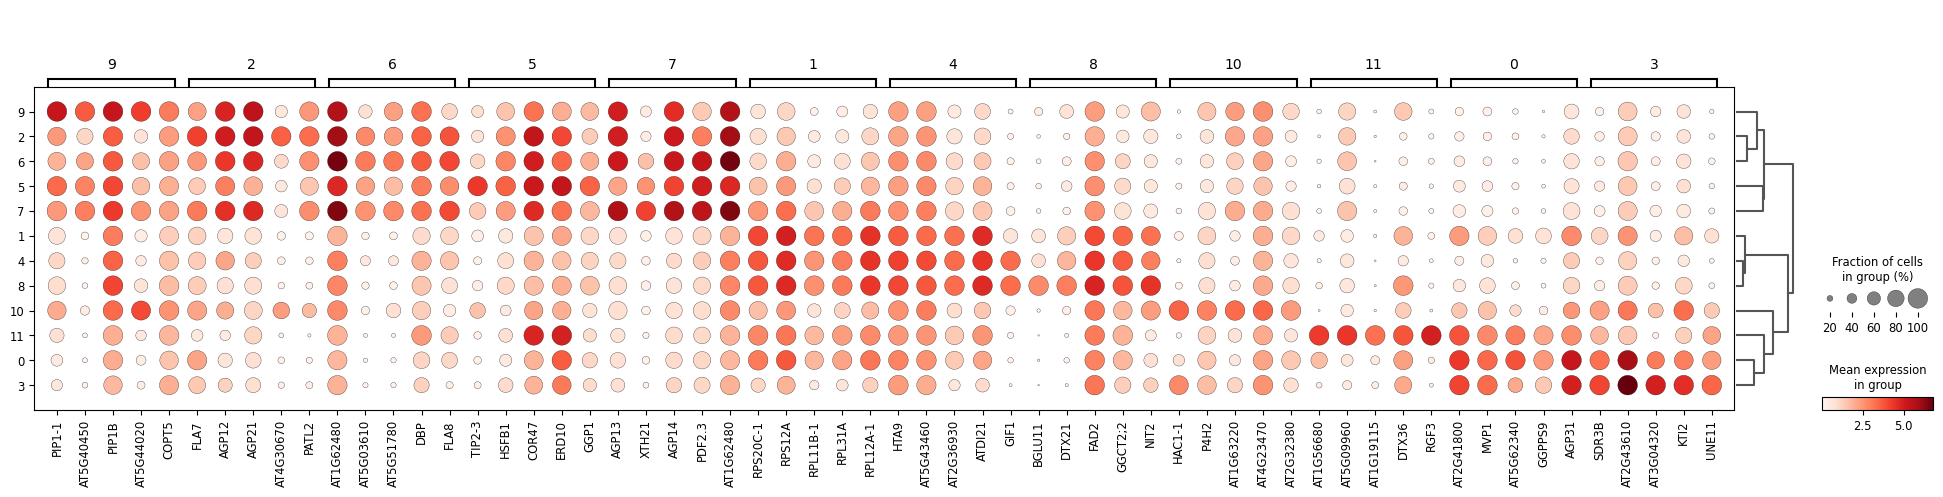

In [38]:
# Dotplot of the highest scoring genes in the dataset
sc.pl.rank_genes_groups_dotplot(adata, n_genes=5)

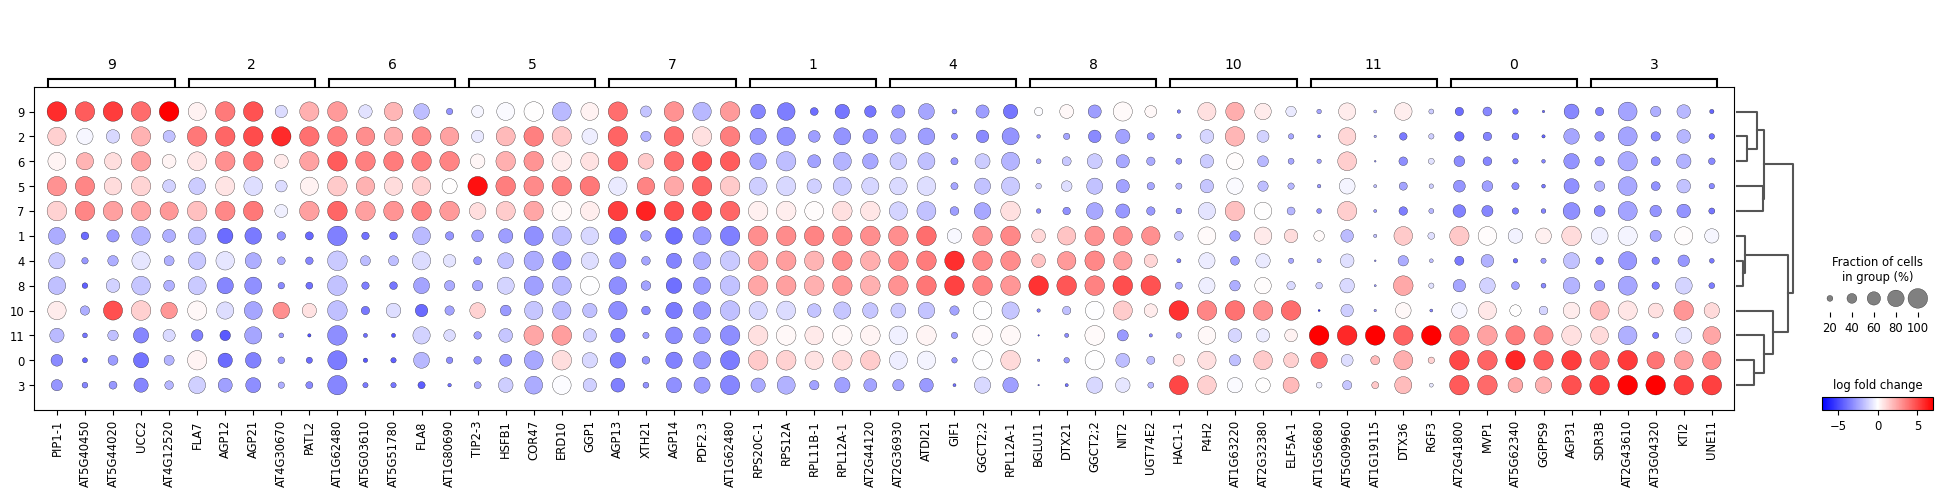

In [39]:
# Dotplot of the logfold changes
sc.pl.rank_genes_groups_dotplot(adata, n_genes=5, values_to_plot='logfoldchanges', min_logfoldchange=3, vmax=7, vmin=-7, cmap='bwr')

By looking at the expression of the top differential genes of cluster 10 with the the BAR eFP browser, it can be concluded that cluster 10 contains trichoblast precursors.
The expression patterns of the top differential genes of cluster 1 and 4 are so similar to cluster 8 that it can be concluded that these clusters also contain cortex cells.

In [40]:
new_cluster_names = ["Root cap 1", 
                     "Cortex 1",
                     "Xylem", 
                     "Root cap 2", 
                     "Cortex 2", 
                     "XPP", 
                     "Phloem", 
                     "Pericycle", 
                     "Cortex 3", 
                     "Endodermis", 
                     "Trichoblast precursor",
                     "QC"]
adata.rename_categories("louvain_1.0", new_cluster_names)

C:\Users\lotte\anaconda3\lib\site-packages\anndata\_core\anndata.py:1160: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  self.obs[key].cat.rename_categories(categories, inplace=True)


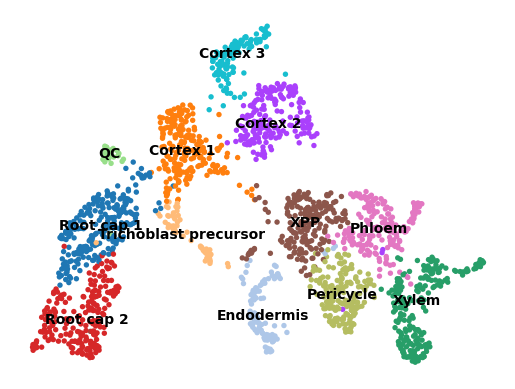

In [41]:
sc.pl.umap(adata, color='louvain_1.0', legend_loc='on data', title='', frameon=False, save='GSE141730.png')